In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import tensorflow as tf

import csv
import cv2
import matplotlib.pyplot as plt
import os
import math

%matplotlib inline

## Read VDO

In [52]:
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
# number = [0, 1, 2, 3, 4, 5, 6, 7, 8,10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20, 21, 22, 23, 24]
# i=0
# label_count = 0
# with open(f"{'db'}.csv", "a", newline="") as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(["label"] + [f"pixel{i+1}" for i in range(28 * 28)])
    
#     for label in labels:
#         #  convert video to image frame by frame
#         cap = cv2.VideoCapture('./video/{}_new.mp4'.format(label))
#         interval = 1000  # read one frame per second
#         cap.set(cv2.CAP_PROP_POS_MSEC, interval)
#         imgs = []
#         while(cap.isOpened()):
#             ret, frame = cap.read()
#             if ret == False:
#                 break
#             cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + interval)
#             #  write frame to image type jpg
#             cv2.imwrite('D:/university/P3T2/DeepLearning/Project/image/posture{}_{}.jpg'.format(label, i), frame)
#             #  append frame type Image to array 'imgs'
#             imgs.append(frame)
#             i+=1
#         cap.release()
#         cv2.destroyAllWindows()
#         #  convert array to np.array
#         imgs = np.array(imgs)
        
#         #  write Image type to csv file
#         for img in imgs:
#             img = Image.fromarray(img)
#             img = img.convert("L")
#             img = img.resize((28, 28), resample=Image.BILINEAR)
#             width, height = img.size
#             #  getdata() : get pixel data from image
#             pixels = list(img.getdata())
#             row = [number[label_count]] + pixels
#             writer.writerow(row)
#             print(img)
        
#         label_count += 1
#         # check which video is already write
#         print('video{}'.format(label))
    
# print('number of image is ' + str(i))

In [53]:
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
# labels = ['A', 'B', 'C']
# number = [0, 1, 2, 3, 4, 5, 6, 7, 8,10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20, 21, 22, 23, 24]
# i=0
# label_count = 0
# with open(f"{'db'}.csv", "a", newline="") as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(["label"] + [f"pixel{i+1}" for i in range(28 * 28)])

#     for label in labels:
#         cap = cv2.VideoCapture('./image/{}_new.mp4'.format(label))
#         interval = 1000  # read one frame per 1000 milisecond
#         cap.set(cv2.CAP_PROP_POS_MSEC, interval)
#         imgs = []
#         while(cap.isOpened()):
#             ret, frame = cap.read()
#             if ret == False:
#                 break
#             cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + interval)
#             imgs.append(frame)
#             i+=1

#         imgs = np.array(imgs)
#         for img in imgs:
#             img = Image.fromarray(img)
#             img = img.convert("L")
#             img = img.resize((28, 28), resample=Image.BILINEAR)
#             width, height = img.size
#             pixels = list(img.getdata())
#             row = [number[label_count]] + pixels
#             writer.writerow(row)

#         label_count += 1
#         cap.release()
#         cv2.destroyAllWindows()

# print('number of image is ' + str(i)) 

## Import Data

In [54]:
# db_df = pd.read_csv("./db_full.csv")
# del db_df['label']

# label_binarizer = LabelBinarizer()
# db_df = db_df.values
# db_df = db_df / 255
# db_df = db_df.reshape(-1,28,28,1)
# plt.imshow(db_df[20])

In [55]:
# load csv
db_df = pd.read_csv("./db_full.csv")

In [56]:
db_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,144,145,147,148,150,153,155,158,160,...,118,116,115,115,114,112,111,109,103,108
1,0,144,145,146,148,150,152,154,157,159,...,118,116,115,115,113,112,111,109,103,108
2,0,145,146,147,148,150,152,154,157,160,...,118,116,115,115,113,112,111,109,103,108
3,0,144,145,146,147,150,152,155,158,160,...,117,116,115,114,113,112,111,109,103,108
4,0,144,145,146,148,150,152,154,157,159,...,117,116,114,114,113,112,111,109,103,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,24,143,145,147,148,148,153,158,160,164,...,61,88,125,125,124,121,118,116,110,106
7973,24,144,145,147,148,148,153,158,160,164,...,61,90,125,125,123,121,118,116,109,106
7974,24,144,145,146,148,148,153,158,160,164,...,61,93,126,125,123,121,118,116,110,106
7975,24,144,145,147,148,147,153,158,160,163,...,61,94,126,125,123,121,118,116,109,106


In [57]:
# random_state : seed
db_df = db_df.sample(frac=1, random_state=1234)

In [58]:
db_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4941,16,138,139,139,138,138,138,139,140,142,...,62,65,64,65,89,121,122,121,119,119
2872,8,145,146,149,152,155,158,161,164,167,...,117,117,116,115,113,110,104,109,109,109
4491,14,138,139,141,142,144,146,148,152,154,...,119,119,118,117,116,116,114,113,112,108
5030,16,138,138,139,138,138,138,139,140,141,...,49,56,58,58,59,83,121,121,119,118
417,1,143,145,146,148,151,153,156,159,161,...,112,111,111,110,109,108,104,99,105,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,10,139,140,142,143,145,150,152,155,158,...,118,115,114,113,112,112,111,108,101,105
7221,22,135,136,138,140,141,145,149,151,155,...,114,116,114,112,111,110,110,108,102,99
1318,3,139,139,141,143,147,150,152,156,159,...,115,116,115,113,111,110,107,101,102,106
723,2,147,148,151,153,156,158,161,163,165,...,114,113,112,111,111,107,102,108,108,109


In [59]:
# split db file into training set and testing set
index = math.ceil(np.shape(db_df)[0] * 0.2)
db_train = db_df[index:]
db_test = db_df[:index]
print(db_train.shape)
print(db_test.shape)

(6381, 785)
(1596, 785)


In [60]:
# concatenation train and test df with train and test db
train_df_org = pd.read_csv("./sign_mnist_train.csv")
test_df_org = pd.read_csv("./sign_mnist_test.csv")
print('train before concat: {}'.format(train_df_org.shape))
print('test before concat: {}'.format(test_df_org.shape))

train_df = pd.concat([train_df_org, db_train])
test_df = pd.concat([test_df_org, db_test])
print('train after concat: {}'.format(train_df.shape))
print('test after concat: {}'.format(test_df.shape))

train before concat: (27455, 785)
test before concat: (7172, 785)
train after concat: (33836, 785)
test after concat: (8768, 785)


In [61]:
train_df_org

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [62]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,10,139,140,142,143,145,150,152,155,158,...,118,115,114,113,112,112,111,108,101,105
7221,22,135,136,138,140,141,145,149,151,155,...,114,116,114,112,111,110,110,108,102,99
1318,3,139,139,141,143,147,150,152,156,159,...,115,116,115,113,111,110,107,101,102,106
723,2,147,148,151,153,156,158,161,163,165,...,114,113,112,111,111,107,102,108,108,109


In [63]:
test_df_org

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [64]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,8,145,147,149,152,155,159,162,164,168,...,117,118,116,115,113,110,104,108,110,109
3063,10,139,140,142,143,146,150,152,155,158,...,116,115,114,114,113,112,111,108,102,105
1095,3,138,139,141,144,147,150,152,156,159,...,114,113,113,112,110,109,108,101,102,106
1517,4,141,142,144,145,146,148,152,155,158,...,121,120,119,118,118,117,115,113,111,105


## Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

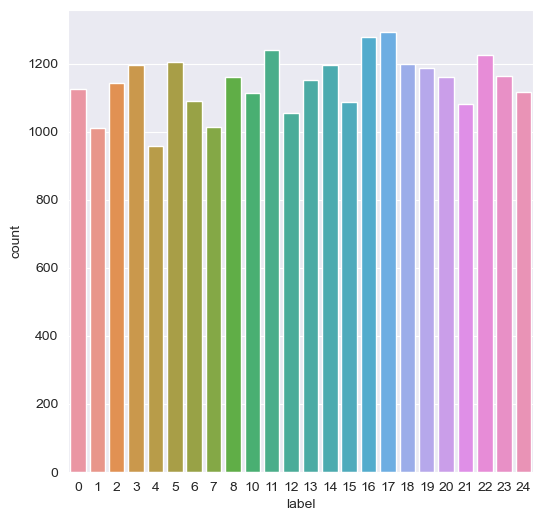

In [65]:
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
sns.countplot(x=train_df_org['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

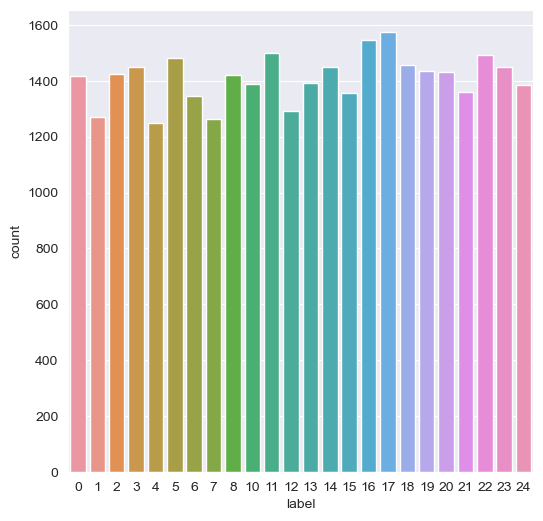

In [66]:
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
sns.countplot(x=train_df['label'])

## Prepare Data

In [67]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [68]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

In [69]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [139, 139, 141, ..., 101, 102, 106],
       [147, 148, 151, ..., 108, 108, 109],
       [144, 146, 149, ..., 108, 109, 109]], dtype=int64)

In [70]:
x_train = x_train / 255
x_test = x_test / 255

In [71]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [72]:
x_train[0].shape

(28, 28, 1)

In [73]:
x_train.shape

(33836, 28, 28, 1)

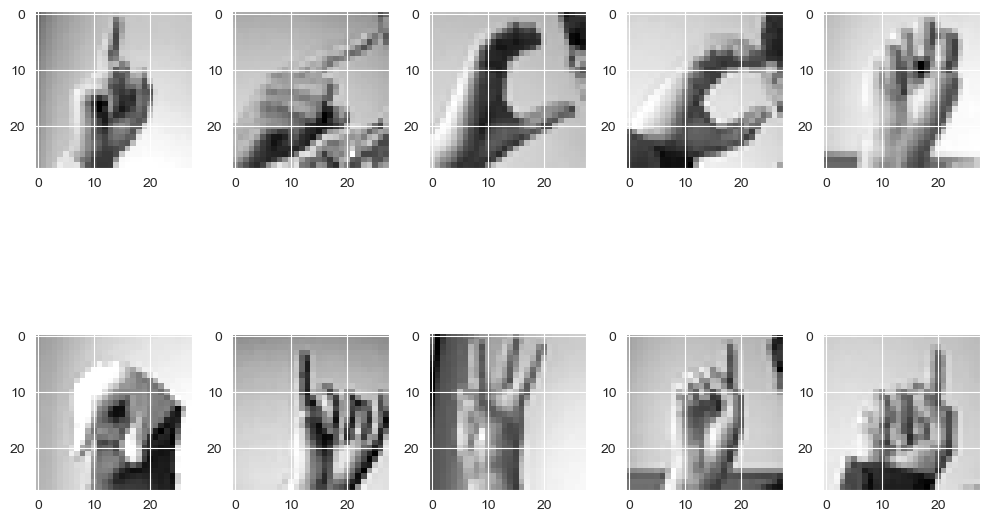

In [74]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

## Data Augmentation

In [75]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)# randomly flip images

In [76]:
datagen.fit(x_train)

In [77]:
datagenOrj = ImageDataGenerator()

In [78]:
datagenOrj.fit(x_train)

In [79]:
result_data     = datagen.flow(x_train, y_train, batch_size=128, shuffle = False)
result_data_orj = datagenOrj.flow(x_train, y_train, batch_size=128, shuffle = False)

In [80]:
batch_images, batch_labels = next(result_data)

In [81]:
batch_images_orj, batch_labels_orj = next(result_data_orj)

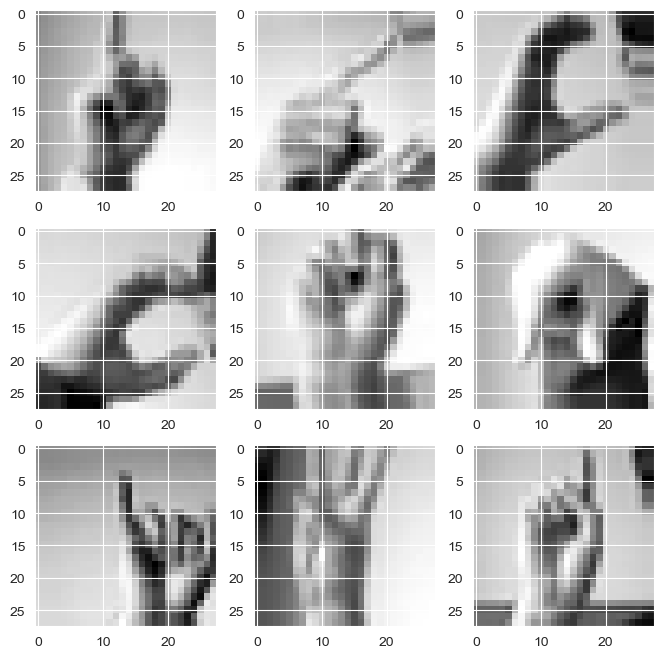

In [82]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch_images[i].reshape(28, 28), cmap="gray")
plt.show()

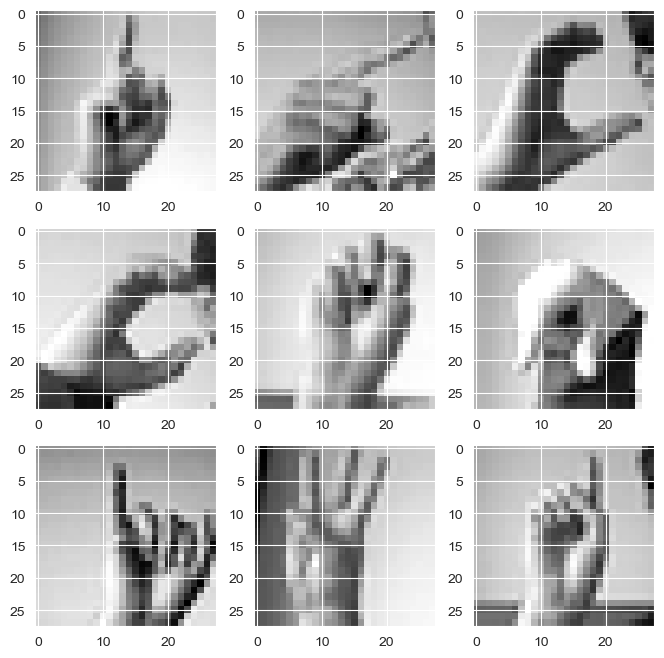

In [83]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch_images_orj[i].reshape(28, 28), cmap="gray")
plt.show()

In [84]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Conv2D(50 , (3,3) , strides = 1, activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Conv2D(25 , (3,3) , strides = 1, activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 50)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 25)         

In [85]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))

Epoch 1/20
265/265 [==============================] - 22s 78ms/step - loss: 2.6580 - accuracy: 0.1924 - val_loss: 1.8217 - val_accuracy: 0.5559
Epoch 2/20
265/265 [==============================] - 21s 80ms/step - loss: 1.3480 - accuracy: 0.5537 - val_loss: 0.8858 - val_accuracy: 0.7665
Epoch 3/20
265/265 [==============================] - 21s 80ms/step - loss: 0.8770 - accuracy: 0.7046 - val_loss: 0.5846 - val_accuracy: 0.8497
Epoch 4/20
265/265 [==============================] - 21s 79ms/step - loss: 0.6650 - accuracy: 0.7727 - val_loss: 0.5034 - val_accuracy: 0.8627
Epoch 5/20
265/265 [==============================] - 21s 79ms/step - loss: 0.5555 - accuracy: 0.8111 - val_loss: 0.3948 - val_accuracy: 0.9010
Epoch 6/20
265/265 [==============================] - 21s 80ms/step - loss: 0.4695 - accuracy: 0.8378 - val_loss: 0.2838 - val_accuracy: 0.9454
Epoch 7/20
265/265 [==============================] - 21s 79ms/step - loss: 0.4121 - accuracy: 0.8570 - val_loss: 0.2609 - val_accuracy:

In [86]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08390317112207413
Test accuracy: 0.987454354763031


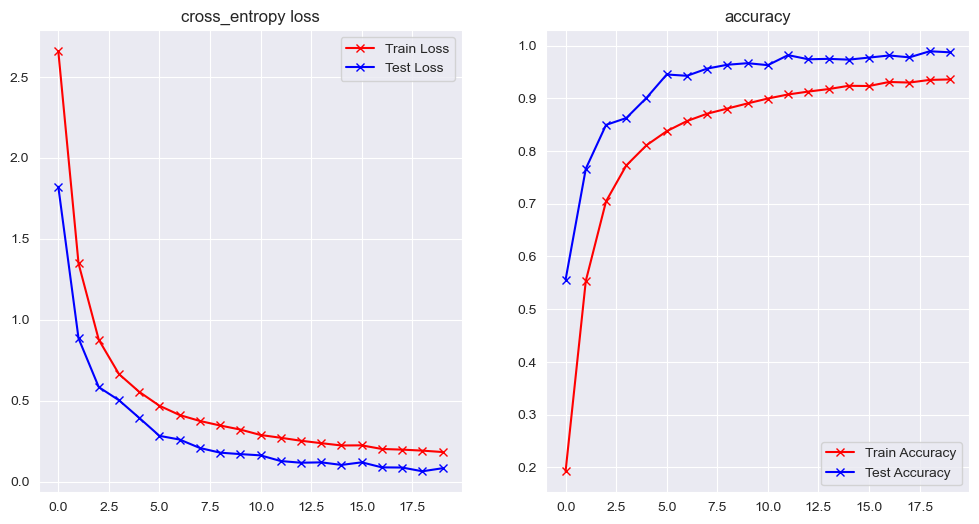

In [87]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Test Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Test Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

In [102]:
# predict input data
i = 0
with open(f"{'test_new_image_db'}.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([f"pixel{i+1}" for i in range(28 * 28)])

    #  convert video to image frame by frame
    cap = cv2.VideoCapture('./video/{}.mp4'.format('test_new'))
    interval = 500  # read one frame per second
    cap.set(cv2.CAP_PROP_POS_MSEC, interval)
    imgs = []
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break
        cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + interval)
        cv2.imwrite('./test_new_image/testImg_{}.jpg'.format(i), frame)
        resized_frame = cv2.resize(frame, (28, 28))
        #  append frame type Image to array 'imgs'
        imgs.append(resized_frame)
        i += 1
    cap.release()
    cv2.destroyAllWindows()
    #  convert array to np.array
    imgs = np.array(imgs)

    #  write Image type to csv file
    for img in imgs:
        img = Image.fromarray(img)
        img = img.convert("L")
        img = img.resize((28, 28), resample=Image.BILINEAR)
        width, height = img.size
        #  getdata() : get pixel data from image
        pixels = list(img.getdata())
        row = pixels
        writer.writerow(row)
        print(img)
    
print('number of image is ' + str(i))

<PIL.Image.Image image mode=L size=28x28 at 0x20724967F40>
<PIL.Image.Image image mode=L size=28x28 at 0x20711EBE430>
<PIL.Image.Image image mode=L size=28x28 at 0x2074AD21100>
<PIL.Image.Image image mode=L size=28x28 at 0x2074B4FDEB0>
<PIL.Image.Image image mode=L size=28x28 at 0x20724967F40>
<PIL.Image.Image image mode=L size=28x28 at 0x207242C1070>
<PIL.Image.Image image mode=L size=28x28 at 0x2074AD21100>
<PIL.Image.Image image mode=L size=28x28 at 0x20724967F40>
<PIL.Image.Image image mode=L size=28x28 at 0x207242C1070>
<PIL.Image.Image image mode=L size=28x28 at 0x2074AD21100>
<PIL.Image.Image image mode=L size=28x28 at 0x20724967F40>
<PIL.Image.Image image mode=L size=28x28 at 0x207242C1070>
<PIL.Image.Image image mode=L size=28x28 at 0x2074AD21100>
<PIL.Image.Image image mode=L size=28x28 at 0x20724967F40>
<PIL.Image.Image image mode=L size=28x28 at 0x207242C1070>
<PIL.Image.Image image mode=L size=28x28 at 0x2074AD21100>
<PIL.Image.Image image mode=L size=28x28 at 0x20724967F4

C:\Users\KanOmPang\AppData\Local\Temp\ipykernel_8044\1935759432.py:31: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((28, 28), resample=Image.BILINEAR)


In [103]:
input_db = pd.read_csv("./test_new_image_db.csv")
input_x = input_db.values
input_x = input_x / 255
input_x = input_x.reshape(-1,28,28,1)

In [104]:
# print output
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
predictions = np.argmax(model.predict(input_x), axis=-1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

count = 0
for index in predictions:
    print('testImg_{}: {}'.format(count, labels[index-1]))
    count += 1

3/3 [==============================] - 0s 5ms/step
testImg_0: F
testImg_1: Y
testImg_2: Y
testImg_3: Y
testImg_4: Y
testImg_5: A
testImg_6: A
testImg_7: A
testImg_8: N
testImg_9: C
testImg_10: K
testImg_11: S
testImg_12: K
testImg_13: G
testImg_14: W
testImg_15: W
testImg_16: W
testImg_17: V
testImg_18: V
testImg_19: N
testImg_20: Y
testImg_21: Y
testImg_22: Y
testImg_23: S
testImg_24: S
testImg_25: S
testImg_26: O
testImg_27: O
testImg_28: S
testImg_29: A
testImg_30: A
testImg_31: K
testImg_32: K
testImg_33: S
testImg_34: S
testImg_35: K
testImg_36: S
testImg_37: S
testImg_38: V
testImg_39: W
testImg_40: V
testImg_41: V
testImg_42: R
testImg_43: R
testImg_44: S
testImg_45: K
testImg_46: K
testImg_47: K
testImg_48: Q
testImg_49: K
testImg_50: Q
testImg_51: Q
testImg_52: Q
testImg_53: N
testImg_54: A
testImg_55: A
testImg_56: A
testImg_57: L
testImg_58: F
testImg_59: F
testImg_60: T
testImg_61: E
testImg_62: E
testImg_63: E
testImg_64: T
testImg_65: O
testImg_66: U
testImg_67: U
testImg

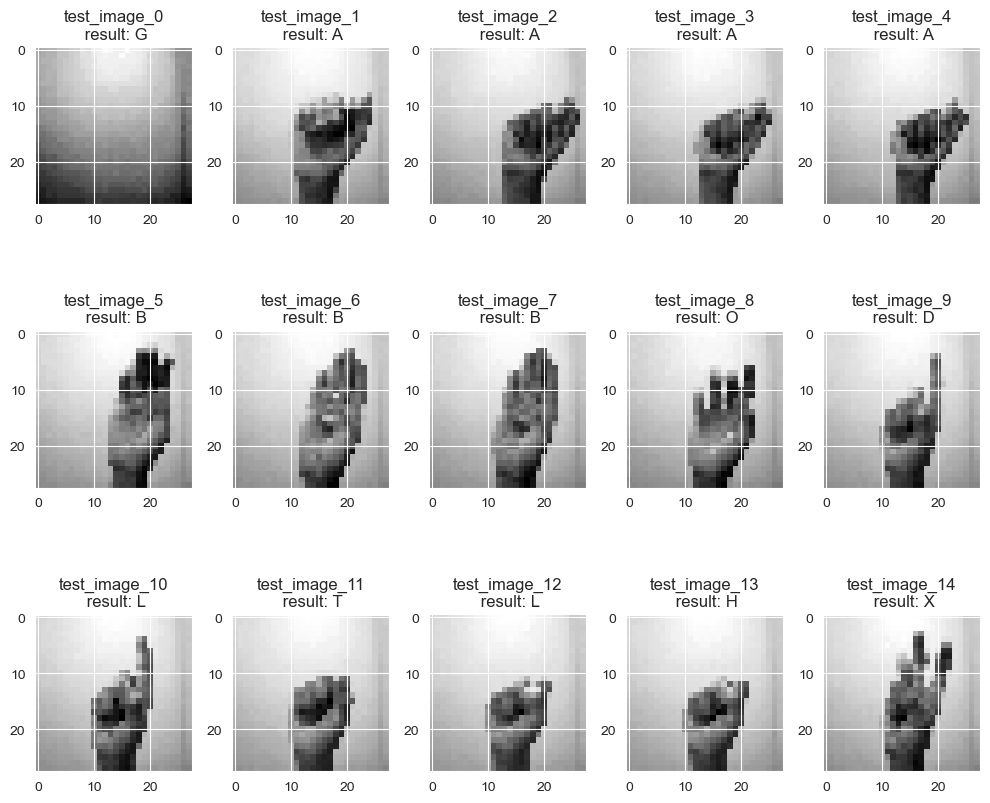

In [105]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(input_x[k].reshape(28, 28), cmap="gray")
        ax[i,j].set_title('test_image_{}\n result: {}'.format(k, labels[predictions[k]]))
        k += 1
    plt.tight_layout()